,Time,Diameter,Height
Min,51,N/A,N/A
Max,128.3,N/A,N/A
Mean,78.41,0.0009446,0.9971
Std,16.12,4.592e-05,0.05111
Relative Error,0.2056,4.862,5.126


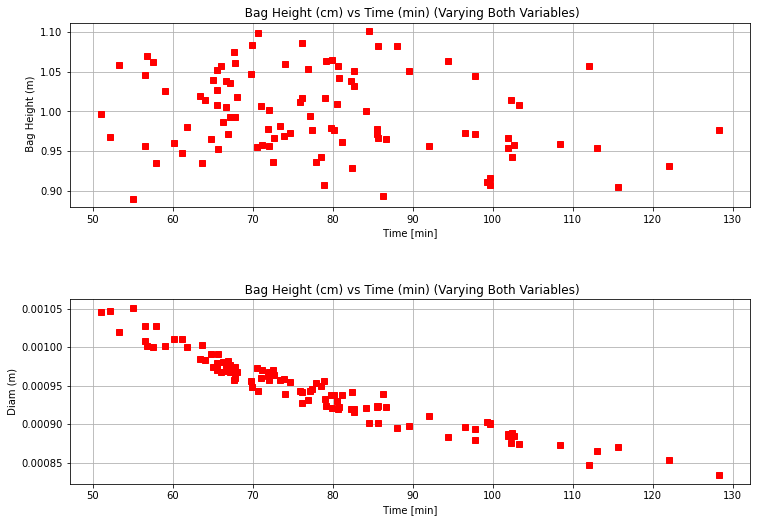

In [22]:
import numpy as np
import math 
from random import random
import matplotlib.pyplot as plt 
import pandas as pd

#set up variables 

d_tube = .952e-3 #in m 
 
h = 1.0 # height of the bags 
h_mean = 1
h_std = h*.05
u_h = .05 # 5% uncertanity of the height 
N = 100 #number of random values 
sigfigs = 4 #designate sig figs 
h_data = np.random.normal(h_mean, h_std,N) #build a random data set with height data 

d_mean = d_tube
d_std = .05*d_tube # 5% Uncertainty for bag diameter
d_data = np.random.normal(d_mean, d_std, N) #build a random data set with diameter data 

mu = 1.0e-3 #kg/m s viscocity 
rho = 1000.0 #Kg/m^3 fluid density 
l_tube = 2.000 #Length of the tubing 
tc_area = np.pi*(100.0*d_tube/2)**2 #Ac tube crossectional area 
p1 = 101325.0 #Atmospheric pressure in pascals 
p2 = 102391.6 #Venous pressure in pascals 
grav = 9.81 # gravity in m/s^2 
sa = (500.0/30.0)*(1/100.0)**2 #bag crossectional area 
vtot = 500.0 # total volume of the IV bag 
icount = 0 
h0 = 0.3 #initial height of the fluid in the IV bag in meters 
h1 = 2.0 #initialize the the equation 

t = 0 # set up time values 
dt = .05 #set up time steps 


def v2(x): #define a function to solve for velocity 
    a = 1.0 
    b = (32.0*mu*l_tube/(rho*d_tube**2))
    c = -(grav*(x+h))
    vel = (-b + math.sqrt(b**2-4.0*a*c))/(2.0*a)
    return vel 

t_final= []

for i in range (N):
    h1 = 2.0
    h0= 0.3
    hf = 0.0 
    t = 0 
    epi = 0.000000001 #dictate a tolerance 
    tol = 20 #define an initial tol 
    h = h_data[i]
    d_tube = d_data[i]
    icount = 0 
    time = 0 
    
    vmax = v2(h0)
    vmin =v2(hf)
    vmax = v2(h0)*60.0*100
    vmin =v2(hf)*60.0*100
    
    qmax = vmax*tc_area #solve for q max
    qmin = vmin*tc_area #solve for q min 

    L_timep =['%.*g'%(sigfigs-1,t/60.0)]
    L_heightp =['%.*g'%(sigfigs-1,h0*100.0)]

    ptime = 0 
    jcount = 0 
    
    
    while (tol>epi): #Euler's Method 
        icount = icount + 1 #initiate icount
        jcount = jcount + 1 #initiate icount
        dd = -(v2(h0)*np.pi*(d_tube/2)**2)/sa #derivitive of function
        h1 = h0 + dt*dd #establish new height 
    
        tol = abs(h1-h0)/h1 #calculate tolerance 
        h0 = h1 ##establish new height
        time = icount*dt #add to count
        ptime = jcount*dt #add to count
        if (ptime == 120.0): #set up if statement 
            L_timep.append('%.*g'%(sigfigs-1,time/60)) #add to time list 
            L_heightp.append('%.*g'%(sigfigs-1,h0*100.0)) #add to height list 
            jcount = 0 
    t_final.append(time/60)

tf_array = np.array(t_final)
tf_mean = np.mean(tf_array)
tf_std = np.std(tf_array)
rel_error = (tf_std/tf_mean)
t_final_min = np.min(tf_array)
t_final_max = np.max(tf_array)

fig = plt.figure(figsize = (14,8))
plt.subplot(2,1,1)
plt.plot(list(t_final),list(h_data),'rs')
plt.grid(True) #add grid 
plt.title("  Bag Height (cm) vs Time (min) (Varying Both Variables) ") #create title 
plt.xlabel(' Time [min] ') #label x axis 
plt.ylabel('  Bag Height (m) ') #label y axis 

plt.subplot(2,1,2)
plt.plot(list(t_final),list(d_data),'rs')
plt.grid(True) #add grid 
plt.title("  Bag Height (cm) vs Time (min) (Varying Both Variables) ") #create title 
plt.xlabel(' Time [min] ') #label x axis 
plt.ylabel(' Diam (m) ') #label y axis 

plt.subplots_adjust(bottom=0.1, right = 0.8, top=0.9 , hspace = 0.5)
fig.savefig('Bag Height vs Time (Varying Both).jpeg')

time_array = ['%.*g'%(sigfigs,t_final_min),'%.*g'%(sigfigs,t_final_max) ,'%.*g'%(sigfigs,tf_mean),'%.*g'%(sigfigs,tf_std),'%.*g'%(sigfigs, rel_error)] 
diam_array =['N/A','N/A','%.*g'%(sigfigs, np.mean(d_data)) ,'%.*g'%(sigfigs,np.std(d_data)),'%.*g'%(sigfigs,(np.std(d_data)/np.mean(d_data))*100)]
h_array =['N/A','N/A','%.*g'%(sigfigs, np.mean(h_data)),'%.*g'%(sigfigs,np.std(h_data)),'%.*g'%(sigfigs, (np.std(h_data)/np.mean(h_data))*100)]

table = pd.DataFrame({' Time ':time_array, 'Diameter': diam_array, ' Height ': h_array})
t_index = (' Min ',' Max ',' Mean ', ' Std ', ' Relative Error ')
table.index = t_index

table

In [25]:
import numpy as np
import math 
from random import random
import matplotlib.pyplot as plt 
import pandas as pd

#set up variables 

d_tube = .952e-3 #in m 
 
h = 1.0 # height of the bags 
h_mean = 1
h_std = h*.05
u_h = .05 # 5% uncertanity of the height 
N = 100 #number of random values 
sigfigs = 4 #designate sig figs 
h_data = np.random.normal(h_mean, h_std,N) #build a random data set with height data 

d_mean = d_tube
d_std = .05*d_tube # 5% Uncertainty for bag diameter
d_data = np.random.normal(d_mean, d_std, N) #build a random data set with diameter data 

mu = 1.0e-3 #kg/m s viscocity 
rho = 1000.0 #Kg/m^3 fluid density 
l_tube = 2.000 #Length of the tubing 
tc_area = np.pi*(100.0*d_tube/2)**2 #Ac tube crossectional area 
p1 = 101325.0 #Atmospheric pressure in pascals 
p2 = 102391.6 #Venous pressure in pascals 
grav = 9.81 # gravity in m/s^2 
sa = (500.0/30.0)*(1/100.0)**2 #bag crossectional area 
vtot = 500.0 # total volume of the IV bag 
icount = 0 
h0 = 0.3 #initial height of the fluid in the IV bag in meters 
h1 = 2.0 #initialize the the equation 

t = 0 # set up time values 
dt = .05 #set up time steps 


def v2(x): #define a function to solve for velocity 
    a = 1.0 
    b = (32.0*mu*l_tube/(rho*d_tube**2))
    c = -(grav*(x+h))
    vel = (-b + math.sqrt(b**2-4.0*a*c))/(2.0*a)
    return vel 

t_final= []

for i in range (N):
    h1 = 2.0
    h0= 0.3
    hf = 0.0 
    t = 0 
    epi = 0.000000001 #dictate a tolerance 
    tol = 20 #define an initial tol 
    #h = h_data[i]
    d_tube = d_data[i]
    icount = 0 
    time = 0 
    
    vmax = v2(h0)
    vmin =v2(hf)
    vmax = v2(h0)*60.0*100
    vmin =v2(hf)*60.0*100
    
    qmax = vmax*tc_area #solve for q max
    qmin = vmin*tc_area #solve for q min 

    L_timep =['%.*g'%(sigfigs-1,t/60.0)]
    L_heightp =['%.*g'%(sigfigs-1,h0*100.0)]

    ptime = 0 
    jcount = 0 
    
    
    while (tol>epi): #Euler's Method 
        icount = icount + 1 #initiate icount
        jcount = jcount + 1 #initiate icount
        dd = -(v2(h0)*np.pi*(d_tube/2)**2)/sa #derivitive of function
        h1 = h0 + dt*dd #establish new height 
    
        tol = abs(h1-h0)/h1 #calculate tolerance 
        h0 = h1 ##establish new height
        time = icount*dt #add to count
        ptime = jcount*dt #add to count
        if (ptime == 120.0): #set up if statement 
            L_timep.append('%.*g'%(sigfigs-1,time/60)) #add to time list 
            L_heightp.append('%.*g'%(sigfigs-1,h0*100.0)) #add to height list 
            jcount = 0 
    t_final.append(time/60)

tf_array = np.array(t_final)
tf_array = np.array(t_final)
tf_mean = np.mean(tf_array)
tf_std = np.std(tf_array)Height
rel_error = (tf_std/tf_mean)
t_final_min = np.min(tf_array)
t_final_max = np.max(tf_array)



fig = plt.figure(figsize = (10,8))
plt.plot(list(t_final),list(d_data),'rs')
plt.grid(True) #add grid 
plt.title("  Bag Height (cm) vs Time (min) (Varying Diameter)") #create title 
plt.xlabel(' Time [min] ') #label x axis 
plt.ylabel(' Height (m) ') #label y axis 
fig.savefig('Bag Height vs Time (Varying Diameter).jpeg')

time_array = ['%.*g'%(sigfigs,t_final_min),'%.*g'%(sigfigs,t_final_max) ,'%.*g'%(sigfigs,tf_mean),'%.*g'%(sigfigs,tf_std),'%.*g'%(sigfigs, rel_error)] 
diam_array =['N/A','N/A','%.*g'%(sigfigs, np.mean(d_data)) ,'%.*g'%(sigfigs,np.std(d_data)),'%.*g'%(sigfigs,(np.std(d_data)/np.mean(d_data))*100)]
h_array =['N/A','N/A','%.*g'%(sigfigs, np.mean(h_data)),0,0]

table = pd.DataFrame({' Time ':time_array, 'Diameter': diam_array, ' Height ': h_array})
t_index = (' Min ',' Max ',' Mean ', ' Std ', ' Relative Error ')
table.index = t_index

table

SyntaxError: invalid syntax (2444204704.py, line 95)

,Time,Diameter,Height
Min,68.06,N/A,N/A
Max,83.09,N/A,N/A
Mean,74.17,0.000952,0.9972
Std,3.025,0,0.0461
Relative Error,0.04078,0,4.623


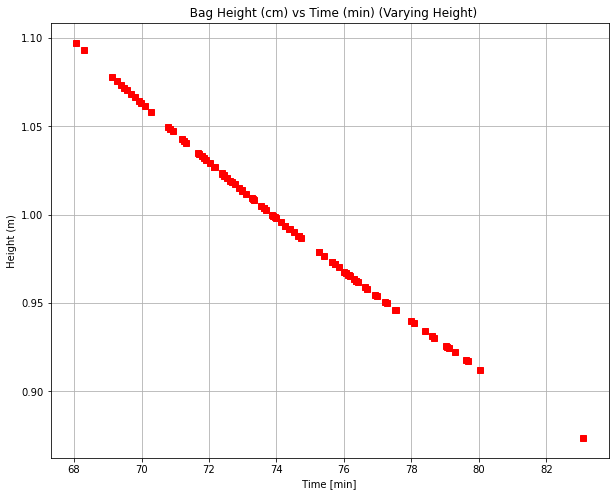

In [24]:
import numpy as np
import math 
from random import random
import matplotlib.pyplot as plt 
import pandas as pd

#set up variables 

d_tube = .952e-3 #in m 
 
h = 1.0 # height of the bags 
h_mean = 1
h_std = h*.05
u_h = .05 # 5% uncertanity of the height 
N = 100 #number of random values 
sigfigs = 4 #designate sig figs 
h_data = np.random.normal(h_mean, h_std,N) #build a random data set with height data 

d_mean = d_tube
d_std = .05*d_tube # 5% Uncertainty for bag diameter
d_data = np.random.normal(d_mean, d_std, N) #build a random data set with diameter data 

mu = 1.0e-3 #kg/m s viscocity 
rho = 1000.0 #Kg/m^3 fluid density 
l_tube = 2.000 #Length of the tubing 
tc_area = np.pi*(100.0*d_tube/2)**2 #Ac tube crossectional area 
p1 = 101325.0 #Atmospheric pressure in pascals 
p2 = 102391.6 #Venous pressure in pascals 
grav = 9.81 # gravity in m/s^2 
sa = (500.0/30.0)*(1/100.0)**2 #bag crossectional area 
vtot = 500.0 # total volume of the IV bag 
icount = 0 
h0 = 0.3 #initial height of the fluid in the IV bag in meters 
h1 = 2.0 #initialize the the equation 

t = 0 # set up time values 
dt = .05 #set up time steps 


def v2(x): #define a function to solve for velocity 
    a = 1.0 
    b = (32.0*mu*l_tube/(rho*d_tube**2))
    c = -(grav*(x+h))
    vel = (-b + math.sqrt(b**2-4.0*a*c))/(2.0*a)
    return vel 

t_final= []

for i in range (N):
    h1 = 2.0
    h0= 0.3
    hf = 0.0 
    t = 0 
    epi = 0.000000001 #dictate a tolerance 
    tol = 20 #define an initial tol 
    h = h_data[i]
    #d_tube = d_data[i]
    icount = 0 
    time = 0 
    
    vmax = v2(h0)
    vmin =v2(hf)
    vmax = v2(h0)*60.0*100
    vmin =v2(hf)*60.0*100
    
    qmax = vmax*tc_area #solve for q max
    qmin = vmin*tc_area #solve for q min 

    L_timep =['%.*g'%(sigfigs-1,t/60.0)]
    L_heightp =['%.*g'%(sigfigs-1,h0*100.0)]

    ptime = 0 
    jcount = 0 
    
    
    while (tol>epi): #Euler's Method 
        icount = icount + 1 #initiate icount
        jcount = jcount + 1 #initiate icount
        dd = -(v2(h0)*np.pi*(d_tube/2)**2)/sa #derivitive of function
        h1 = h0 + dt*dd #establish new height 
    
        tol = abs(h1-h0)/h1 #calculate tolerance 
        h0 = h1 ##establish new height
        time = icount*dt #add to count
        ptime = jcount*dt #add to count
        if (ptime == 120.0): #set up if statement 
            L_timep.append('%.*g'%(sigfigs-1,time/60)) #add to time list 
            L_heightp.append('%.*g'%(sigfigs-1,h0*100.0)) #add to height list 
            jcount = 0 
    t_final.append(time/60)

tf_array = np.array(t_final)
tf_array = np.array(t_final)
tf_mean = np.mean(tf_array)
tf_std = np.std(tf_array)
rel_error = (tf_std/tf_mean)
t_final_min = np.min(tf_array)
t_final_max = np.max(tf_array)

fig = plt.figure(figsize = (10,8))
plt.plot(list(t_final),list(h_data),'rs')
plt.grid(True) #add grid 
plt.title("  Bag Height (cm) vs Time (min) (Varying Height)") #create title 
plt.xlabel(' Time [min] ') #label x axis 
plt.ylabel(' Height (m) ') #label y axis 
fig.savefig('Bag Height vs Time (Varying Height).jpeg')

time_array = ['%.*g'%(sigfigs,t_final_min),'%.*g'%(sigfigs,t_final_max) ,'%.*g'%(sigfigs,tf_mean),'%.*g'%(sigfigs,tf_std),'%.*g'%(sigfigs, rel_error)] 
diam_array =['N/A','N/A','%.*g'%(sigfigs, d_mean) ,0,0]
h_array =['N/A','N/A','%.*g'%(sigfigs, np.mean(h_data)),'%.*g'%(sigfigs,np.std(h_data)),'%.*g'%(sigfigs, (np.std(h_data)/np.mean(h_data))*100)]

table = pd.DataFrame({' Time ':time_array, 'Diameter': diam_array, ' Height ': h_array})
t_index = (' Min ',' Max ',' Mean ', ' Std ', ' Relative Error ')
table.index = t_index

table